<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L2_Metrics_for_UQ_and_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##  **Introduction to decision-making under uncertainty**

* Familiarize with uncertainty modelling and quantification
* Metrics for uncertainty quantification and decision-making:
  * **Set-epistemic** similarity scores, for **epistemic** uncertainty and **robust optimization**
    * Jaccard
    * Hausdorff distance

  * **Probabilistic** scores, dissimilarity/divergence metrics, for **aleatoric** uncertainty and **stochastic programming**
      * Statistics on a proposal distribution
      * Dissimilarity between proposal and target distributions
      

$$ ~$$


**Epistemic uncertainty**: Reducible  ⏩ Uncertainty set $x ∈ X$
  
$$ ~$$
**Aleatoric uncertainty**: Irreducible  ⏩ Probabilistic model $\mathbb{P}(x)$, $ \forall x ∈ X$  
$$ ~$$

**Epistemic + Aletory uncertainty**: uncertainty on probabilities ⏩  $\mathbb{P}(x) \in \{ \mathbb{P}(x; \theta): \theta ∈ \Theta \} $ or, $\mathbb{P}(x) \in [\underline{\mathbb{P}}(x), \overline{\mathbb{P}}(x)]   $






In [18]:
import sys
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.stats import norm

***Metrics for robust optimization:***

*Uncertainty sets:*


The **Jaccard distance** measures the dissimilarity between two sets by calculating the complement of their intersection over their union.
$$d_J(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|}$$




In [19]:
A = {"Geeks", "for", "Geeks", "NLP", "DSc"}
B = {"Geek", "for", "Geeks", "DSc.", 'ML', "DSA"}

def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))
    return intersection / union

def jaccard_distane(set1, set2):
    return 1-jaccard_similarity(set1, set2)

# Intersaction and Union of two sets can also be done using & and | operators.
C = A.intersection(B)
D = A.union(B)

print('AnB = ', C)
print('AUB = ', D)
similarity = jaccard_similarity(A, B)
print("J(A,B) =:", similarity)
print("Distanc Jac(A,B) =:", jaccard_distane(A, B))

AnB =  {'Geeks', 'for'}
AUB =  {'Geeks', 'for', 'Geek', 'DSA', 'ML', 'NLP', 'DSc.', 'DSc'}
J(A,B) =: 0.25
Distanc Jac(A,B) =: 0.75


In [20]:
# Corrected Set A and Set B using tuples instead of lists
A = {(0, 12), (1, 11), (2, 10), (3, 11), (4, 12)}  # Set A
B = {(0, 2), (1, 2), (2, 2), (3, 3), (4, 2)}  # Set B

# Intersection and Union of two sets can also be done using & and | operators.
A_and_B = A & B  # Intersection
A_or_B = A | B  # Union
print('A ∪ B =', A_or_B)
print('A ∩ B =', A_and_B)

# Compute the Jaccard Similarity
similarity = jaccard_similarity(A, B)
print("J(A,B) =:", similarity)
print("Distanc Jac(A,B) =:", jaccard_distane(A, B))

A ∪ B = {(1, 2), (1, 11), (2, 10), (4, 12), (4, 2), (0, 12), (0, 2), (3, 3), (2, 2), (3, 11)}
A ∩ B = set()
J(A,B) =: 0.0
Distanc Jac(A,B) =: 1.0


**Hausdorff distance**


The **Hausdorff distance** distance quantifies how far two subsets A and B of a metric space are from each other. It considers the maximum of the shortest distances from any point in one set to the other set.

$$d_H(A, B) = \max\left(\sup\limits_{a \in A} \inf\limits_{b \in B} d(a,b), \sup\limits_{b \in B} \inf\limits_{a \in A} d(a,b)\right)$$

In [21]:
from scipy.spatial.distance import directed_hausdorff  # For Hausdorff distance

def hausdorff_distance(set_a, set_b): # this function computes Hausdorff Distance between two sets
    # Directed Hausdorff distance (from set_a to set_b, and vice versa)
    return max(directed_hausdorff(set_a, set_b)[0], directed_hausdorff(set_b, set_a)[0])


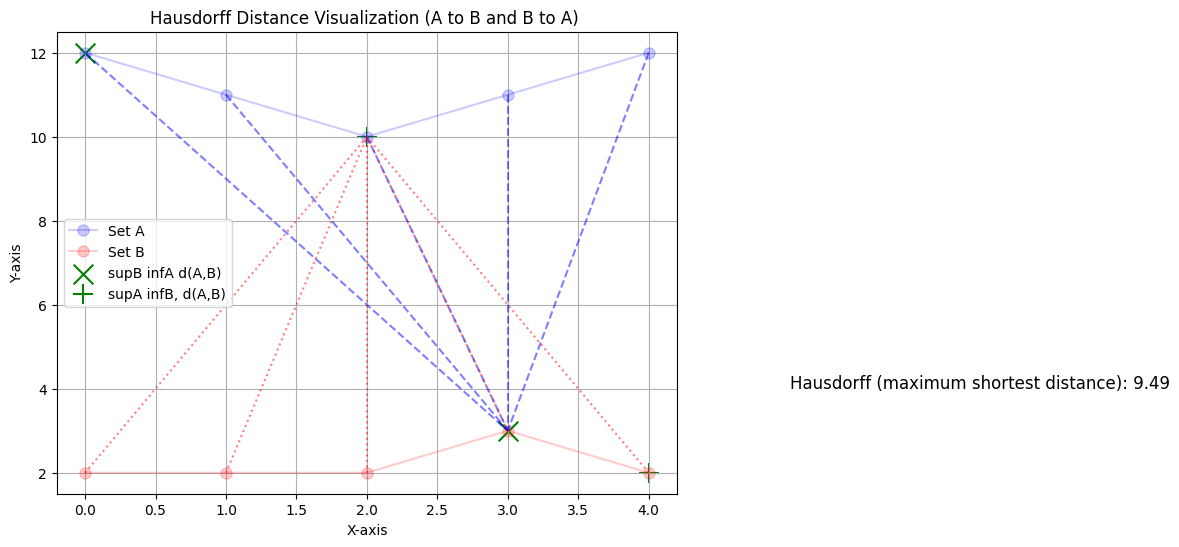

In [22]:

# Define two 2D sets (curves or point sets)
set_a = np.array([[0, 12], [1, 11], [2, 10], [3, 11], [4, 12]])  # Set A
set_b = np.array([[0, 2], [1, 2], [2, 2], [3, 3], [4, 2]])  # Set B

# Hausdorff distance calculation
distA2B, id1A, id1B =directed_hausdorff(set_a, set_b)
distB2A, id2B, id2A =directed_hausdorff(set_b, set_a)

hausdorff_dist = max(distA2B, distB2A)

# Plot the sets
plt.figure(figsize=(8, 6))

# Plot Set A and Set B
plt.plot(set_a[:, 0], set_a[:, 1], 'bo-', label="Set A", markersize=8, alpha=0.2)
plt.plot(set_b[:, 0], set_b[:, 1], 'ro-', label="Set B", markersize=8, alpha =0.2)

# Mark the Hausdorff distance
for i in range(len(set_a)):
    closest_b = np.argmin(np.linalg.norm(set_b - set_a[i], axis=1))
    plt.plot([set_a[i, 0], set_b[closest_b, 0]], [set_a[i, 1], set_b[closest_b, 1]], 'b--', alpha=0.5)

for i in range(len(set_b)):
    closest_a = np.argmin(np.linalg.norm(set_a - set_b[i], axis=1))
    plt.plot([set_b[i, 0], set_a[closest_a, 0]], [set_b[i, 1], set_a[closest_a, 1]], 'r:', alpha=0.5)

# Annotate the Hausdorff Distance
plt.text(5, 4, f"Hausdorff (maximum shortest distance): {hausdorff_dist:.2f}", fontsize=12, color='black')

plt.scatter(set_b[id1B, 0], set_b[id1B, 1], 200, 'g', marker='x', label="supB infA d(A,B)")
plt.scatter(set_b[id2B, 0], set_b[id2B, 1], 200, 'g', marker='+', label="supA infB, d(A,B)")

plt.scatter(set_a[id1A, 0], set_a[id1A, 1], 200, 'g', marker='x')
plt.scatter(set_a[id2A, 0], set_a[id2A, 1], 200, 'g', marker='+')

plt.title("Hausdorff Distance Visualization (A to B and B to A) ")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


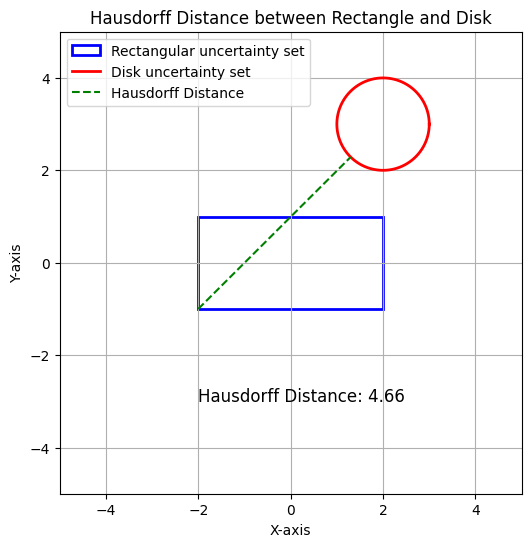

In [23]:
# Define a rectangle and a disk
rectangle_corners = np.array([[-2, -1], [2, -1], [2, 1], [-2, 1]])  # A simple rectangle

radius = 1
center = np.array([2, 3])

def plot_rectangle_and_disk(rectangle_corners=rectangle_corners, center=center, radius=radius):

  angle = np.linspace(0, 2 * np.pi, 100)  # Disk angles for the boundary
  disk_boundary = np.array([center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle)]).T

  # Compute the Hausdorff distance between the rectangle and the disk boundary
  hdist = hausdorff_distance(rectangle_corners, disk_boundary)

  val1, idxa1, idxb1 = directed_hausdorff(rectangle_corners, disk_boundary)
  val2, idxb2, idxa2 = directed_hausdorff(disk_boundary, rectangle_corners)

  idx_a = [idxa1, idxa2]
  idx_b = [idxb1, idxb2]

  hdist = max(val1,val2)
  idx = np.argmax([val1,val2])

  idx_a= idx_a[idx]
  idx_b = idx_b[idx]

  # Plot the rectangle and disk
  plt.figure(figsize=(8, 6))

  # Plot rectangle (closed polygon) and disk boundary
  rectangle = plt.Polygon(rectangle_corners, closed=True, fill=None, edgecolor='blue', linewidth=2, label='Rectangular uncertainty set')
  plt.gca().add_patch(rectangle)
  plt.plot(disk_boundary[:, 0], disk_boundary[:, 1], 'r-', label='Disk uncertainty set', linewidth=2)

  # Mark the Hausdorff distance (MaxMin distance between rectangle and disk boundary)
  # Here we just highlight the closest points
  closest_points_rectangle_to_disk = [rectangle_corners[idx_a], disk_boundary[idx_b]]
  plt.plot([closest_points_rectangle_to_disk[0][0], closest_points_rectangle_to_disk[1][0]],
          [closest_points_rectangle_to_disk[0][1], closest_points_rectangle_to_disk[1][1]], 'g--', label='Hausdorff Distance')

  # Annotate Hausdorff distance
  plt.text(-2, -3, f"Hausdorff Distance: {hdist:.2f}", fontsize=12, color='black')

  # Adjust plot settings
  plt.title("Hausdorff Distance between Rectangle and Disk")
  plt.xlim([-5, 5])
  plt.ylim([-5, 5])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_rectangle_and_disk(rectangle_corners=rectangle_corners, center=center, radius=radius)

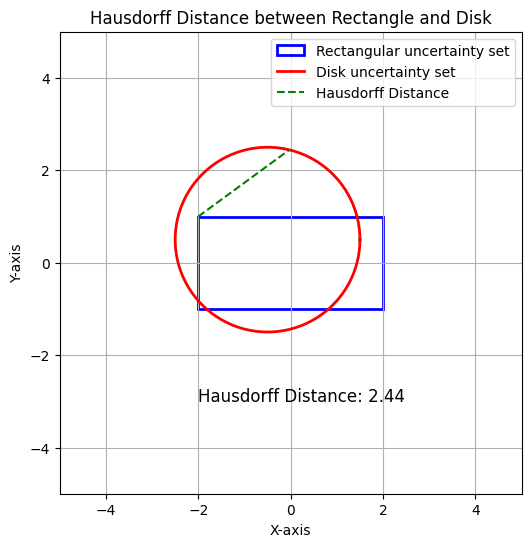

In [24]:
plot_rectangle_and_disk(rectangle_corners=rectangle_corners, center= np.array([-0.5, 0.5]), radius=2)

# Metrics to deal with aleatoric uncertainty and stochastic programming:

**Probabilitiy density (PDF)**

$$f(x) = \frac{d}{dx} F(x)$$


**Probability distribution (CDF)**
$$F(x) = \int_{-\infty}^x f(t) \, dt$$

**Expected value, variance, higher-order moments**

$$\mu = \mathbb{E}[X] = \int_{-\infty}^\infty x f(x) \, dx$$
$$\sigma^2=\mathbb{E}[(X-\mu)^2] = \int_{-\infty}^\infty (x-\mu)^2 f(x) \, dx$$  
$$\mu_n = \mathbb{E}[X^n] = \int_{-\infty}^\infty (x-c)^n f(x) \, dx$$
  

**Value-at-risk and percentile**

$$\text{VaR}_{\alpha} = \inf \{ x : F(x) \geq \alpha \}  = F^{-1}(\alpha)$$


**Tails expectations, Conditional Value-at-Risk**

$$\text{CVaR}_{\alpha} = \mathbb{E}[X \, | \, X \geq \text{VaR}_{\alpha}]$$


In [25]:
class Gaussian:
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma
    self.dist = norm(loc=self.mu, scale=self.sigma)

  def pdf(self, x):
    return (1 / (self.sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self.mu) / self.sigma) ** 2)

  def cdf(self, x):
    return 0.5 * (1 + np.vectorize(math.erf)((x - self.mu) / (self.sigma * np.sqrt(2))))

  def icdf(self, alpha):
    return self.dist.ppf(alpha)

  def VaR(self, alpha): # Value-at-risk at level alpha = inverse_cdf(alpha)
     return self.icdf(alpha)

  def CVaR(self, alpha, side = 'left'): #  Conditional Value-at-Risk (CVaR) at level alpha.
    pdf_at_z = self.pdf(self.icdf(alpha) )  # Standard normal PDF at z_alpha

    if side == 'right': # Right-tail CVaR
        return  self.mu + self.sigma * pdf_at_z / (1 - alpha)

    elif side == 'left': # Left-tail CVaR
        return  self.mu - self.sigma * pdf_at_z / alpha
    else:
        raise ValueError("Invalid 'side' argument. Use 'right' or 'left'.")
    return

  def sample(self, n_samples):  # sample uniformly alpha in [0,1] -> inverse CDF
      alpha_vals = np.random.uniform(0, 1, n_samples)
      return self.icdf(alpha_vals)


In [39]:
Gauss_1 = Gaussian(mu=4, sigma=1)
alpha=0.1
print(f"alpha: {alpha:.4f}")
X = Gauss_1.sample(10_000_000)
print(" --------------------")
print(" ----------Value at Risk ----------")
VaR= Gauss_1.VaR(alpha)
print(f"VaR a: {Gauss_1.VaR(alpha):.4f}")
print(f"VaR e: {np.quantile(X,alpha):.4f}")
print(f"VaR 1-alpha a: {Gauss_1.VaR(1-alpha):.4f}")
print(f"VaR 1-alpha e: {np.quantile(X,1-alpha):.4f}")
print(" --------------------")
print(" ---------- Correspinding density and distribution ----------")
pdf_at_var = Gauss_1.pdf(VaR)
print(f"f(x=VaR): {pdf_at_var:.4f}")
print(f"F(x=VaR): {Gauss_1.cdf(VaR):.4f} = alpha ")

alpha: 0.1000
 --------------------
 ----------Value at Risk ----------
VaR a: 2.7184
VaR e: 2.7184
VaR 1-alpha a: 5.2816
VaR 1-alpha e: 5.2817
 --------------------
 ---------- Correspinding density and distribution ----------
f(x=VaR): 0.1755
F(x=VaR): 0.1000 = alpha 


In [40]:
print(" --------------------")
print(" ----------Conditional Value at Risk ----------")

CvaR_right_estimated = np.mean(X[X>= np.quantile(X,1-alpha)])
print(f"CVaR (right) estimated: {CvaR_right_estimated:.4f}  > VaR 1-alpha")

CvaR_left_estimated = np.mean(X[X<=np.quantile(X,alpha)])
print(f"CVaR (left) estimated: {CvaR_left_estimated:.4f}  < VaR alpha")

CvaR_right = Gauss_1.CVaR(1-alpha, 'right')
print(f"CVaR (right) closed form: {CvaR_right:.4f} ~ estimated")
CvaR_right = Gauss_1.CVaR(alpha, 'left')
print(f"CVaR (left) closed form: {CvaR_right:.4f} ~ estimated")

 --------------------
 ----------Conditional Value at Risk ----------
CVaR (right) estimated: 5.7545  > VaR 1-alpha
CVaR (left) estimated: 2.2452  < VaR alpha
CVaR (right) closed form: 5.7550 ~ estimated
CVaR (left) closed form: 2.2450 ~ estimated


In [44]:
# Define a Gaussian Mixture Model (GMM)
class GaussianMixtureModel:
    """Mixture of Gaussians"""

    def __init__(self, components, weights):
        self.components = components  # List of Gaussian components
        self.weights = weights  # List of weights for each component

    def pdf(self, x):
        result = np.zeros_like(x)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.pdf(x)
        return result

    def cdf(self, x):
        result = np.zeros_like(x)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.cdf(x)
        return result

    def icdf(self, alpha):
        result = np.zeros_like(alpha)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.icdf(alpha)
        return result

    def sample(self, n_samples):
        samples = []
        for _ in range(n_samples):
            # Choose a component based on the weights
            component = np.random.choice(self.components, p=self.weights)
            sample = component.sample(1)  # Sample 1 value from the chosen component
            samples.append(sample[0])
        return np.array(samples)


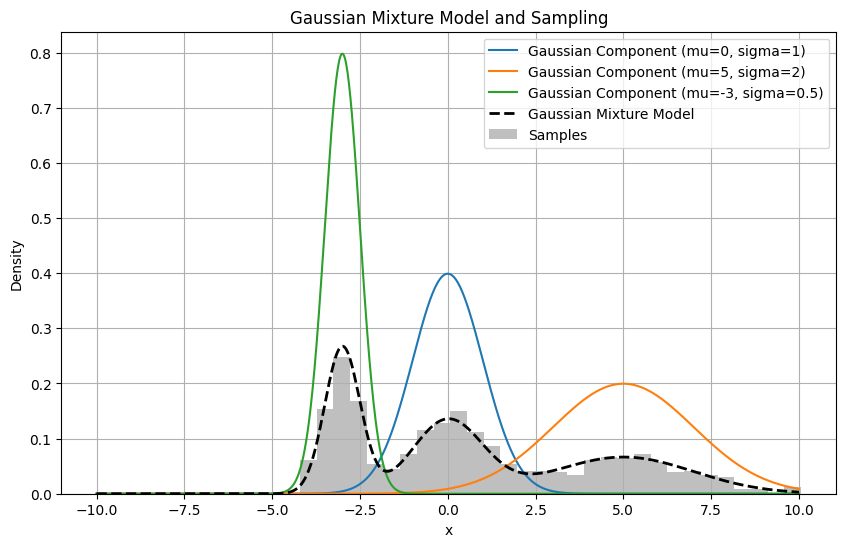

In [45]:
# Define Gaussian components
gaussian1 = Gaussian(mu=0, sigma=1)
gaussian2 = Gaussian(mu=5, sigma=2)
gaussian3 = Gaussian(mu=-3, sigma=0.5)

# Define weights for the mixture
weights = [1/3, 1/3, 1/3]  # Sum to 1

# Create GMM
GMM3 = GaussianMixtureModel(components=[gaussian1, gaussian2, gaussian3], weights=weights)

# Sample data from the GMM
n_samples = 1000
samples = GMM3.sample(n_samples)

# Define x values for plotting the PDF
x = np.linspace(-10, 10, 1000)

# Plot individual Gaussian PDFs and the GMM PDF
plt.figure(figsize=(10, 6))

# Plot each Gaussian component
for component, weight in zip(GMM3.components, GMM3.weights):
    plt.plot(x, component.pdf(x), label=f'Gaussian Component (mu={component.mu}, sigma={component.sigma})')

# Plot the overall GMM PDF
plt.plot(x, GMM3.pdf(x), label='Gaussian Mixture Model', linewidth=2, color='black', linestyle='--')

# Plot sampled data points
plt.hist(samples, bins=30, density=True, alpha=0.5, color='gray', label='Samples')

plt.title('Gaussian Mixture Model and Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

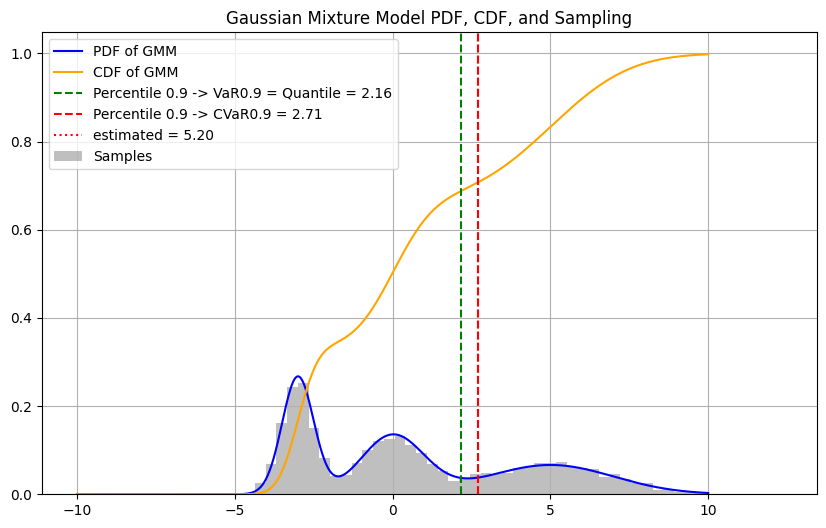

In [46]:
# Evaluate PDF at some points
pdf_values = GMM3.pdf(x)

# Evaluate CDF at some points
cdf_values = GMM3.cdf(x)

# Compute inverse CDF for a probability level
quantile_90 = GMM3.icdf(0.9)
tail_expectation_right = np.mean([GMM3.icdf(gamma) for gamma in np.linspace(0.9,0.9999 , 300)])


# Sample from the GMM
samples = GMM3.sample(5_000)
tail_expectation_right_estimated =  np.mean(samples[samples>=quantile_90])


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label="PDF of GMM", color="blue")
plt.plot(x, cdf_values, label="CDF of GMM", color="orange")
plt.axvline(quantile_90, color="green", linestyle="--", label=f"Percentile 0.9 -> VaR0.9 = Quantile = {quantile_90:.2f}")
plt.axvline(tail_expectation_right, color="red", linestyle="--", label=f"Percentile 0.9 -> CVaR0.9 = {tail_expectation_right:.2f}")
plt.axvline(tail_expectation_right, color="red", linestyle=":", label=f"estimated = {tail_expectation_right_estimated:.2f}")

plt.hist(samples, bins=50, density=True, alpha=0.5, color='gray', label='Samples')
plt.legend()
plt.title("Gaussian Mixture Model PDF, CDF, and Sampling")
plt.grid()
plt.show()


# *Distance and divergence:*  

Distance between target and proposal distribution






- Kolmogorov-Smirnov (KS) distance

$d_{KS}(F, \hat{F}) = \sup_x |F(x) - \hat{F}(x)|$


In [28]:
from scipy.stats import ks_2samp

# Kolmogorov-Smirnov Distance
def kolmogorov_smirnov_distance(cdf_vals_target, cdf_vals_proposal):
  ks_distance = np.max(np.abs(cdf_vals_target - cdf_vals_proposal))
  ks_index = np.argmax(np.abs(cdf_vals_target - cdf_vals_proposal))
  return ks_distance, ks_index

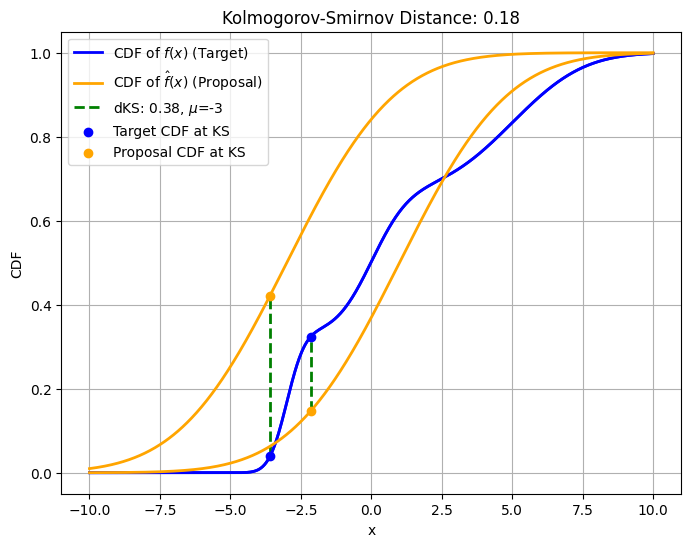

In [36]:

cdf_target = GMM3.cdf(x)

plt.figure(figsize=(8, 6))
proposed_mean_vals = [-3, 1]
for proposed_mean in proposed_mean_vals:
    cdf_proposal = Gaussian(mu=proposed_mean, sigma=3).cdf(x)

    # Calculate the Kolmogorov-Smirnov Distance
    ks_distance, ks_index = kolmogorov_smirnov_distance(cdf_target, cdf_proposal)

    # Get the point of maximum distance
    x_ks = x[ks_index]
    y_target = cdf_target[ks_index]
    y_proposal = cdf_proposal[ks_index]


    plt.plot(x, cdf_target, label=r"CDF of $f(x)$ (Target)", color="blue", linewidth=2)
    plt.plot(x, cdf_proposal, label=r"CDF of $\hat{f}(x)$ (Proposal)", color="orange", linewidth=2)

    # Highlight the KS distance
    plt.vlines(
        x=x_ks,
        ymin=min(y_target, y_proposal),
        ymax=max(y_target, y_proposal),
        colors="green",
        linestyle="--",
        label=f"dKS: {ks_distance:.2f}, $\mu$={proposed_mean}",
        linewidth=2
    )
    plt.scatter([x_ks], [y_target], color="blue", zorder=5, label="Target CDF at KS")
    plt.scatter([x_ks], [y_proposal], color="orange", zorder=5, label="Proposal CDF at KS")
    if proposed_mean==proposed_mean_vals[0]:
      plt.legend()

# Add titles, labels, and legend
plt.title(f"Kolmogorov-Smirnov Distance: {ks_distance:.2f}")
plt.xlabel("x")
plt.ylabel("CDF")

plt.grid()
plt.show()

### TO DO

Find one with the smallest possible KS distance for the target

$ \theta^\star = \arg\min\limits_{\theta\in[-3,3]^2} \sup_x |F(x) - \hat{F}(x;\theta)|$

where
$(\mu,\sigma) = \theta$

In [ ]:
## ADD YOUR CODE HERE
# ... a grid search
# mean in [-3,3]....
# sigma in [-3,3]...





- Kullback-Leibler

$D_{KL}(p \| q) = \int p(x) \log \frac{p(x)}{q(x)} \, dx$


- Bhattacharyya Distance

$D_B(f, \hat{f}) = -\log \int \sqrt{f(x) \hat{f}(x)} \, dx$


- Jensen-Shannon (JS) divergence

$D_{JS}(f \| \hat{f}) = \frac{1}{2} D_{KL}\left(f \| m\right) + \frac{1}{2} D_{KL}\left(\hat{f} \| m\right)$


In [ ]:
from scipy.stats import entropy  # For KL divergence

 # This is our target (THIS IS GENERALLY UNKNOWN, e.g., ESTIMATED EMPIRICALLY FROM DATA)
pdf_target = lambda x: GMM3.pdf(x)
pdf_proposal = lambda x: Gaussian(2, 3).pdf(x)

# Kullback-Leibler Divergence
def kl_divergence(p, q, x):
    # p(x)*np.log(p(x)/q(x))
    return entropy(p(x), q(x))

def shannon_entropy(f, x):
    return -np.sum(f(x) * np.log(f(x) + np.finfo(float).eps))  # Prevent log(0)

# Total Variation Distance
def total_variation(p, q, x):
    return 0.5 * np.sum(np.abs(p(x) - q(x)))

# Bhattacharyya Distance
def battacharya_distance(f, f_hat, x):
    term1 = np.sum(np.sqrt(f(x) * f_hat(x)))
    return -np.log(term1)

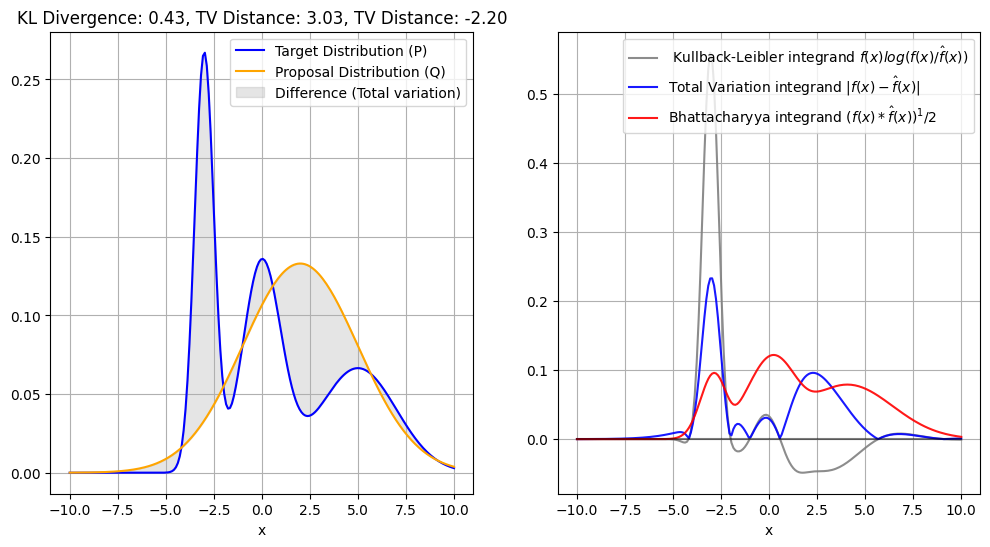

In [ ]:

# Compute KL divergence
x = np.linspace(-10, 10, 200)
d_kl = kl_divergence(pdf_target, pdf_proposal, x)
d_tv = total_variation(pdf_target, pdf_proposal, x)
d_bt= battacharya_distance(pdf_target, pdf_proposal, x)

fig, ax = plt.subplots(1,2,figsize=(12, 6))

# Plot the two distributions
ax[0].plot(x, pdf_target(x), label="Target Distribution (P)", color="blue")
ax[0].plot(x, pdf_proposal(x), label="Proposal Distribution (Q)", color="orange")
ax[0].set_title(f"KL Divergence: {d_kl:.2f}, TV Distance: {d_tv:.2f}, TV Distance: {d_bt:.2f}")

ax[0].fill_between(x, pdf_target(x), pdf_proposal(x), color="gray", alpha=0.2, label="Difference (Total variation)")
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('x')


ax[1].plot(x, pdf_target(x)* (np.log(pdf_target(x)) - np.log(pdf_proposal(x))), color="gray", alpha=0.9, label=" Kullback-Leibler integrand $f(x)log(f(x)/\hat{f}(x))$")
ax[1].plot(x, np.abs(pdf_target(x) - pdf_proposal(x)), color="blue", alpha=0.9, label="Total Variation integrand $|f(x) - \hat{f}(x)|$")
ax[1].plot(x, np.sqrt(pdf_target(x) * pdf_proposal(x)), color="red", alpha=0.9, label="Bhattacharyya integrand $(f(x) * \hat{f}(x))^1/2$")
ax[1].plot(x, np.zeros(shape=np.shape(x)), color="k", alpha=0.5)
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('x')
plt.show()